In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt 
import os
import io
import requests
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, KFold

In [2]:
#inputs = [[x1,x1,...],[x2,x2,...]] STRINGS
#outputs = [y,y,...] STRINGS
def load_data(filename, inputs_variables_names,
              output_variable_name):
    data = []
    data_names = []
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                data_names = row
            else:
                data.append(row)
            line_count += 1

    selected_variables_index = [data_names.index(variable) for variable in inputs_variables_names]
    inputs = []
    for var in selected_variables_index:
        inputs.append([data[index][var] for index in range(len(data))])

    output_selected_index = data_names.index(output_variable_name)
    outputs = [data[index][output_selected_index] for index in range(len(data))]

    return inputs, outputs

In [3]:
excluded = []
#input = [[x1,x1,...],[x2,x2,...]] SAU [y,y,...]
#output = [[x1,x1,...],[x2,x2,...]] SAU [y,y,...]
def fromStringToNumericData(values):
    global excluded
    if isinstance(values[0], list):
        aux = []

        for i in range(len(values)):
            for j in range(len(values[i])):
                #if(values[i][j]=="" or values[i][j]=="0"):
                if(values[i][j]==""):
                    excluded.append(j)

        for i in range(len(values)):
            line = []
            for j in range(len(values[i])): 
                if((j not in excluded) and (j not in excluded)):
                    line.append(float(values[i][j]))
                    
            aux.append(line)

        return aux
    
    else:
        aux = []

        for i in range(len(values)):
            #if (values[i]=="" or values[i]=="0"):
            if (values[i]==""):
                excluded.append(i)
        for i in range(len(values)):
            if ((i not in excluded) and (i not in excluded)):
                aux.append(float(values[i]))

        return aux
    

def fromStringToNumericData2(values):
    if isinstance(values[0], list):
        aux = []

        for i in range(len(values)):
            line = []
            for j in range(len(values[i])): 
                if(values[i][j]=="M"):
                    line.append(1)
                elif(values[i][j]=="B"):
                    line.append(0)
                    
            aux.append(line)

        return aux
    
    else:
        aux = []

        for i in range(len(values)):
            if(values[i]=="M"):
                aux.append(1)
            elif(values[i]=="B"):
                aux.append(0)

        return aux
    
def fromStringToNumericData3(values):
    if isinstance(values[0], list):
        aux = []

        for i in range(len(values)):
            line = []
            for j in range(len(values[i])): 
                if(values[i][j]=="Iris-setosa"):
                    line.append(0)
                elif(values[i][j]=="Iris-versicolor"):
                    line.append(1)
                elif(values[i][j]=="Iris-virginica"):
                    line.append(2)
            aux.append(line)

        return aux
    
    else:
        aux = []

        for i in range(len(values)):
            if(values[i]=="Iris-setosa"):
                aux.append(0)
            elif(values[i]=="Iris-versicolor"):
                aux.append(1)
            elif(values[i]=="Iris-virginica"):
                aux.append(2)
        return aux

In [4]:
def plot_histogram(x, name):
    plt.hist(x, 10)
    plt.title('Histogram of ' + name)
    plt.show()

#ins = [X,X,...] + nume
#outs = [X,X,...] + nume
def plot(ins, outs,in_name,out_name):
    print(ins[:5])
    print(outs[:5])

    plot_histogram(ins, in_name)
    plot_histogram(outs, out_name)

    plt.plot(ins, outs, 'ro')
    plt.xlabel(in_name)
    plt.ylabel(out_name)
    plt.show()

In [5]:
def plot3Ddata(x1, x2, y, x1Model = None, x2Model = None, yModel = None, x1Test = None, x2Test = None, yTest = None, title = None, featureName1=None, featureName2=None, outputName=None):
    #x1,x2,y = datele de input/output 
    #[X,X,...]
    #x1Model,x2Model,yModel = "xref + yref" AKA _rezultatul_
    #[X,X,...]
    #x1Test,x2Test,yTest = date de input/output "pastrate" pentru testare
    #[X,X,...]

    ax = plt.axes(projection = '3d')

    if (x1):
        plt.scatter(x1, x2, y, c = 'r', marker = 'o', label = 'train data') 

    if (x1Model):
        plt.scatter(x1Model, x2Model, yModel, c = 'b', marker = '_', label = 'learnt model') 

    if (x1Test):
        plt.scatter(x1Test, x2Test, yTest, c = 'g', marker = '^', label = 'test data')  

    if(title):
        plt.title(title)
    else:
        plt.title(featureName1+" vs "+featureName2+" vs "+outputName)
    ax.set_xlabel(featureName1)
    ax.set_ylabel(featureName2)
    ax.set_zlabel(outputName)
    plt.legend()
    plt.show()
    
def plot2Ddata(x,y,xModel=None,yModel=None,xTest=None,yTest=None,title=None,featureName=None,outputName=None):
    #x,y = datele de input/output
    #[X,X,...]
    #xModel,yModel = "xref + yref" AKA _rezultatul_
    #[X,X,...]
    #xTest,yTest = date de input/output "pastrate" pentru testare
    #[X,X,...]
    
    if(x):
        plt.plot(x,y,'ro',label='training data')

    if(xModel):
        plt.plot(xModel,yModel,"b-",label="learnt model")
    
    if(xTest):
        plt.plot(xTest,yTest,"g^",label="test data")

    if(title):
        plt.title(title)
    elif(featureName and outputName):
        plt.title(featureName+" vs "+outputName)
    plt.xlabel(featureName)
    plt.ylabel(outputName)
    plt.legend()
    plt.show()

def plotPredictions2D(x,y,ycomputed,title=None,featureName=None,outputName=None):
    # x,y,ycomputed = [X,X,...]
    plt.plot(x,y,'ro',label="real test data")
    plt.plot(x,ycomputed,"g^",label="computed test data")
    if(title):
        plt.title(title)
    elif(featureName and outputName):
        plt.title(featureName+" vs "+outputName)
    plt.xlabel(featureName)
    plt.ylabel(outputName)
    plt.legend()
    plt.show()

def get_ref_3w(x1,x2,w0,w1,w2,noOfPoints = 25):
    #x1,x2 = [X,X,...]
    #w0,w1,w2 = float
    xref1 = []
    val = min(x1)
    step1 = (max(x1) - min(x1)) / noOfPoints
    for _ in range(1, noOfPoints):
        for _ in range(1, noOfPoints):
            xref1.append(val)
        val += step1

    xref2 = []
    val = min(x2)
    step2 = (max(x2) - min(x2)) / noOfPoints
    for _ in range(1, noOfPoints):
        aux = val
        for _ in range(1, noOfPoints):
            xref2.append(aux)
            aux += step2

    yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
    
    return xref1,xref2,yref

def get_ref_2w(x,w0,w1,noOfPoints=50):
    #x1 = [X,X,...]
    #w0,w1 = float
    xref = []
    val = min(x)
    step = (max(x) - min(x)) / noOfPoints
    for _ in range(1, noOfPoints):
        xref.append(val)
        val += step

    yref = [w0 + w1 * el for el in xref]
    
    return xref,yref

In [6]:
def impartire(inputs,outputs):
    #inputs = [[X1,X2],[X1,X2],...]
    #outputs = [Y,Y,...]
    #outputuri = same ^
    #np.random.seed(5)
    indexes = [i for i in range(len(inputs))]
    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes  if not i in trainSample]

    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    #trainInputs, testInputs = normalisation(trainInputs, testInputs)
    #trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

    return trainInputs,trainOutputs,testInputs,testOutputs


def test_eroare(computed_outputs,real_outputs):
    error = 0.0
    for t1, t2 in zip(computed_outputs, real_outputs):
        error += (t1 - t2) ** 2
    return error/len(real_outputs)

# Problema 1

In [9]:
featureNames = ["Economy..GDP.per.Capita."]
outputName = "Happiness.Score"
fileName = "data/world-happiness-report-2017.csv"

In [10]:
inputs, outputs = load_data(fileName, featureNames, outputName)
inputs = fromStringToNumericData(inputs)
outputs = fromStringToNumericData(outputs)

[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
[7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


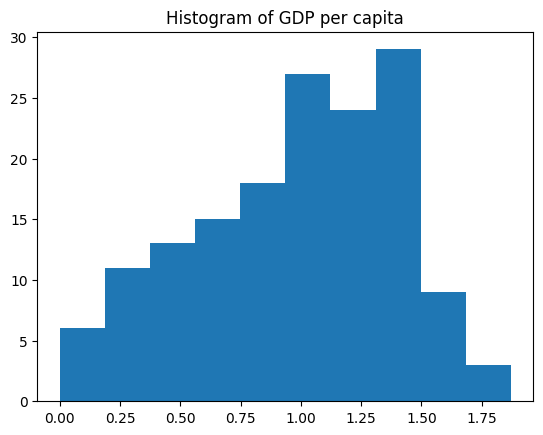

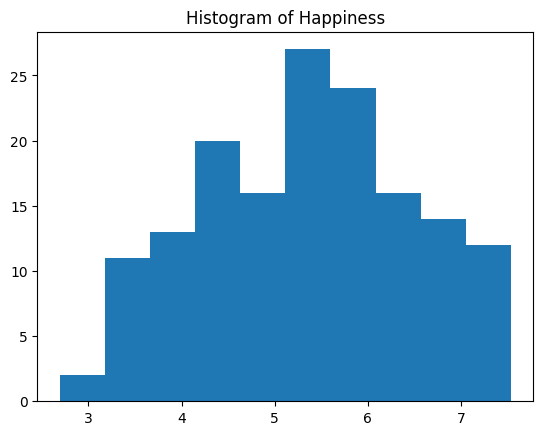

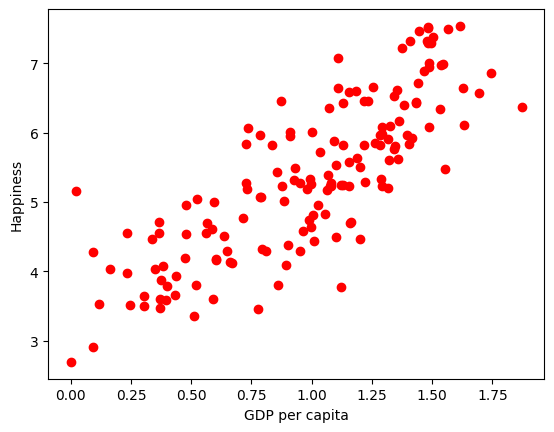

In [11]:
plot(inputs[0],outputs,"GDP per capita","Happiness")

In [12]:
inTr,outTr,inTe,outTe = impartire(inputs[0],outputs)

In [13]:
regressor = linear_model.SGDRegressor()
regressor.fit([[e1] for e1 in inTr],outTr)
w0,w1 = regressor.intercept_[0], regressor.coef_[0]
print('f(x) = ', w0, '+', w1, '* x1')

f(x) =  2.738000897299532 + 2.584147965776072 * x1


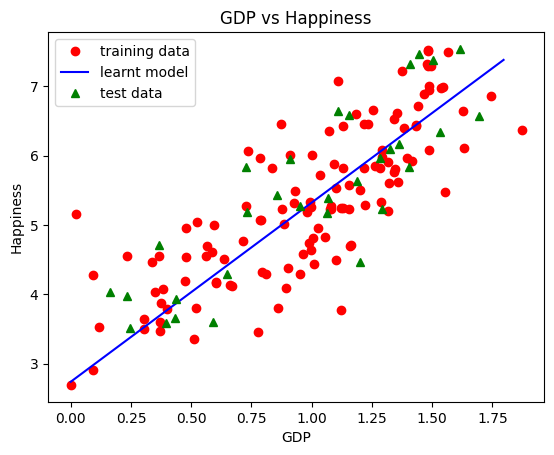

In [14]:
xref,yref = get_ref_2w(inputs[0],w0,w1)
plot2Ddata(inTr,outTr,xref,yref,inTe,outTe,featureName="GDP",outputName="Happiness")

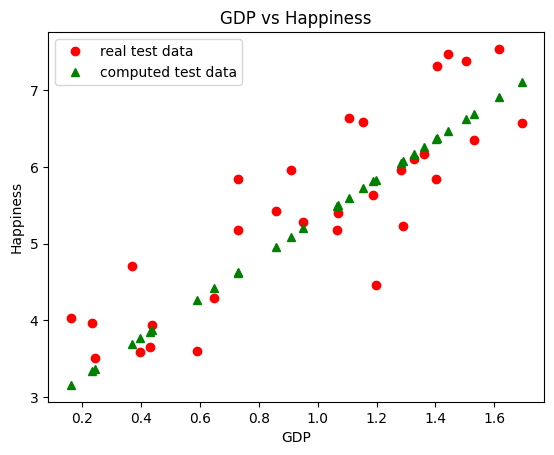

In [15]:
computedOutTe = regressor.predict([[e1] for e1 in inTe])
plotPredictions2D(inTe,outTe,computedOutTe,featureName="GDP",outputName="Happiness")

In [16]:
print("Eroare: ",test_eroare(outTe,computedOutTe))

Eroare:  0.43950367129178786


# Rezolvare 2

In [19]:
featureNames = ["Economy..GDP.per.Capita.","Freedom"]
outputName = "Happiness.Score"
fileName = "data/world-happiness-report-2017.csv"

In [20]:
inputs, outputs = load_data(fileName, featureNames, outputName)
inputs = fromStringToNumericData(inputs)
outputs = fromStringToNumericData(outputs)

[1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
[7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


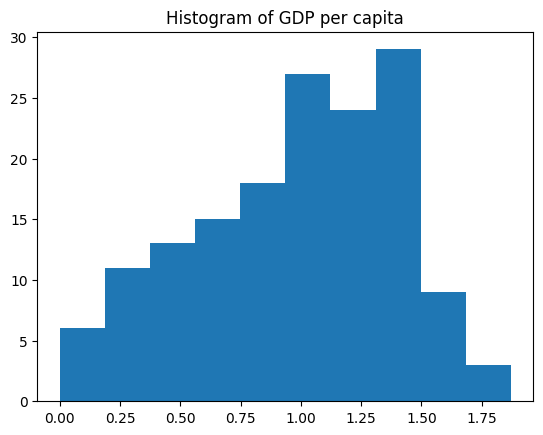

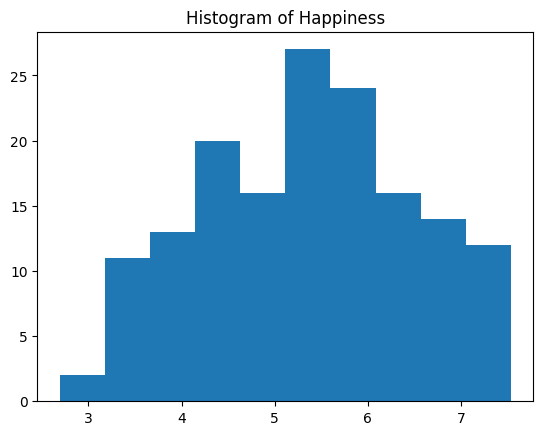

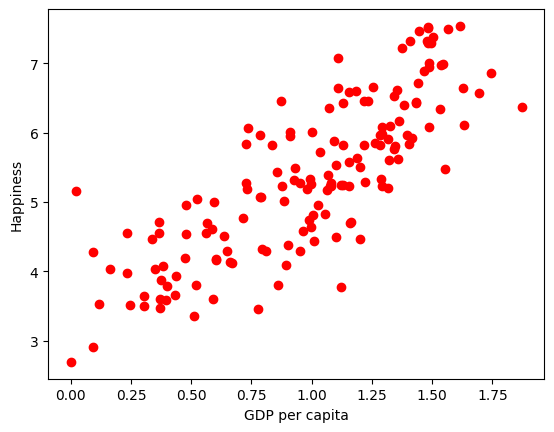

[0.635422587394714, 0.626006722450256, 0.627162635326385, 0.620070576667786, 0.617950856685638]
[7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


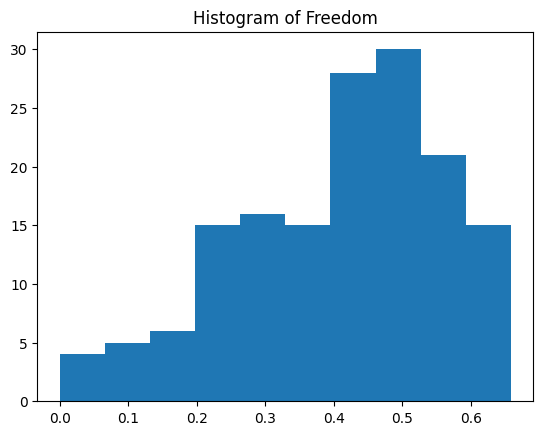

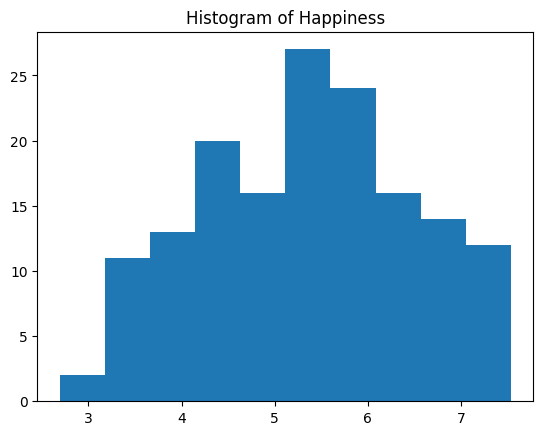

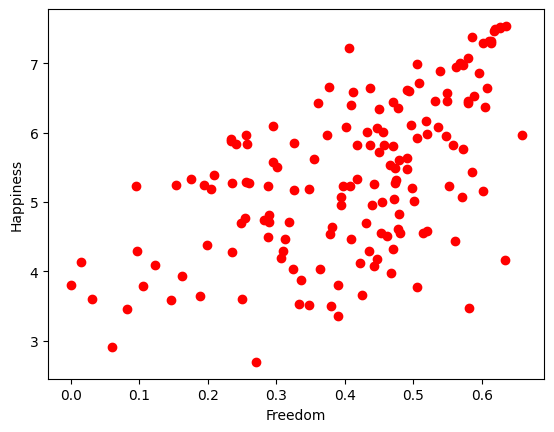

In [21]:
plot(inputs[0],outputs,"GDP per capita","Happiness")
plot(inputs[1],outputs,"Freedom","Happiness")

In [22]:
inputs2 = [[e1,e2] for e1,e2 in zip(inputs[0],inputs[1])]
inTr,outTr,inTe,outTe = impartire(inputs2,outputs)
outTr = [[e] for e in outTr]
outTe = [[e] for e in outTr]

In [23]:
def init_params(nr_features):
    #np.random.seed(0)
    weights = np.random.rand(nr_features, 1)
    w0 = np.ones((1,1))
    return [weights,w0]

def forward(params,x): #Make predictions based on weights and biases
    weights,w0 = params
    prediction = x @ weights + w0
    return prediction

#mse = Mean Square Error
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

def mse_grad(actual,predicted):# calculate gradient
    return predicted-actual # *2 

def backward(params,x,lr,grad): 
    w_grad = (x.T / x.shape[0]) @ grad #weights gradient
    b_grad = np.mean(grad, axis=0) #biases gradient

    params[0] -= w_grad * lr
    params[1] -= b_grad * lr
                        
    return params

In [24]:
lr = 1e-4
epoch = 501

train_x = np.array(inTr)
train_y = np.array(outTr)
valid_x = np.array(inTe)
valid_y = np.array(outTe)

params = init_params(train_x.shape[1])

for i in range(epoch):
    predictions = forward(params,train_x) #make predictions
    grad = mse_grad(train_y,predictions) #calculate gradient

    params = backward(params,train_x,lr,grad)#update params

    if i% 100 == 0:
        predictions = forward(params,valid_x)
        valid_loss = mse(valid_y,predictions)

        print(f"Epoch {i} loss: {valid_loss}")

params

Epoch 0 loss: 13.358087232216443
Epoch 100 loss: 12.871463659905992
Epoch 200 loss: 12.4065937163054
Epoch 300 loss: 11.962510944513724
Epoch 400 loss: 11.538291686252
Epoch 500 loss: 11.13305318963088


[array([[0.82954208],
        [0.87742989]]),
 array([[1.16141278]])]

# Problema 2

In [26]:
featureNames = ["radius1","texture1"]
outputName = "Diagnosis"
fileName = "data/wdbc.csv"
inputs, outputs = load_data(fileName, featureNames, outputName)
inputs = fromStringToNumericData(inputs)

[17.99, 20.57, 19.69, 11.42, 20.29]
['M', 'M', 'M', 'M', 'M']


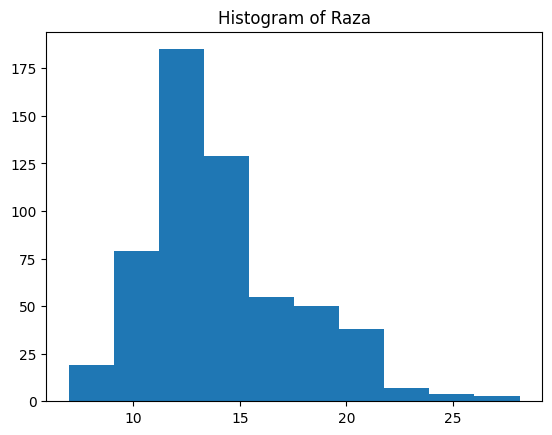

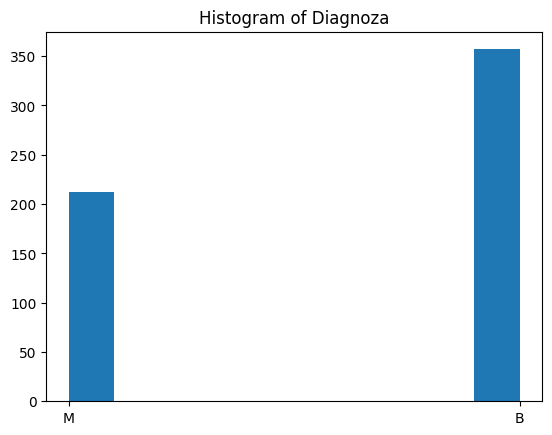

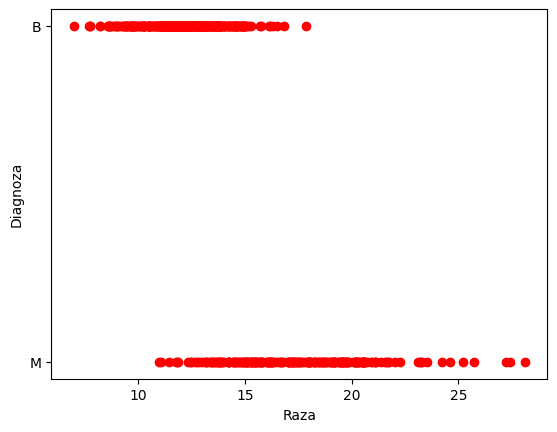

[10.38, 17.77, 21.25, 20.38, 14.34]
['M', 'M', 'M', 'M', 'M']


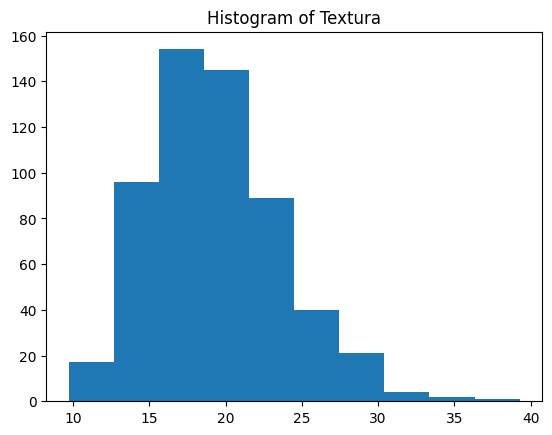

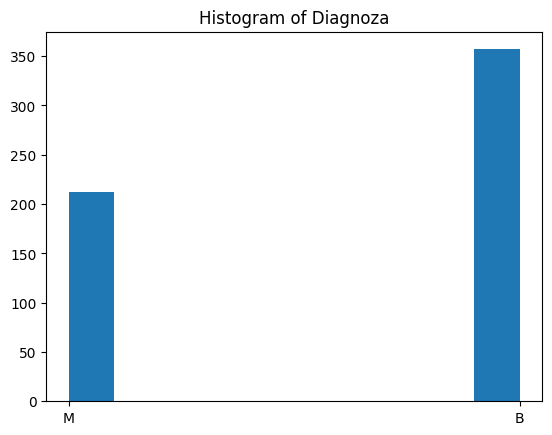

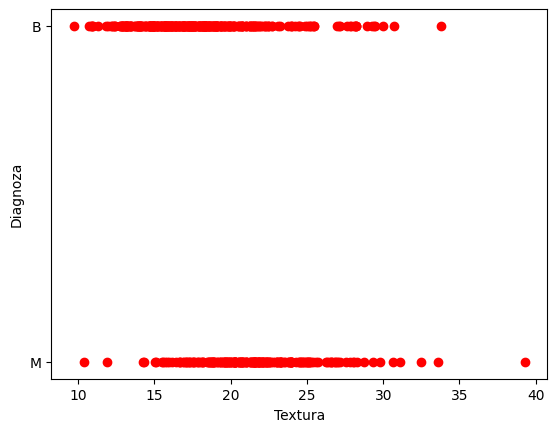

In [27]:
plot(inputs[0],outputs,"Raza","Diagnoza")
plot(inputs[1],outputs,"Textura","Diagnoza")

In [28]:
inputs2 = [[e1,e2] for e1,e2 in zip(inputs[0],inputs[1])]
inTr,outTr,inTe,outTe = impartire(inputs2,outputs)

In [29]:
regressor = linear_model.LogisticRegression()
regressor.fit(inTr,outTr)
computedOutTe = regressor.predict([e1 for e1 in inTe])

In [30]:
target_names = ['B', 'M']
print(classification_report(outTe, computedOutTe, target_names=target_names))

              precision    recall  f1-score   support

           B       0.93      0.94      0.93        67
           M       0.91      0.89      0.90        47

    accuracy                           0.92       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



In [31]:
y_pred = regressor.predict([[18.0,10.0]])
print(y_pred)

['M']


# Rezolvare 2

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y)) #gradients
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        # Depinde cat de "antrenat" e
        # Daca e destul de antrenat, valorile o sa fie apropiate de 1, respectiv 0
        return class_pred
    #TODO: PLOTARE ACCURACY CU THRESHOLDURI DIFERITE 0.5/0.6/ETC.

In [33]:
inTr = np.array(inTr)
outTr = fromStringToNumericData2(outTr)
outTr = np.array(outTr)

inTe = np.array(inTe)
outTe = fromStringToNumericData2(outTe)
outTe = np.array(outTe)

regressor = LogisticRegression(lr = 0.001,n_iters=100000)

regressor.fit(inTr,outTr)

computedOutTe = regressor.predict(inTe)

In [34]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(computedOutTe, outTe)
print(acc)

0.8947368421052632


# Problema 3

[5.1, 4.9, 4.7, 4.6, 5.0]
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']


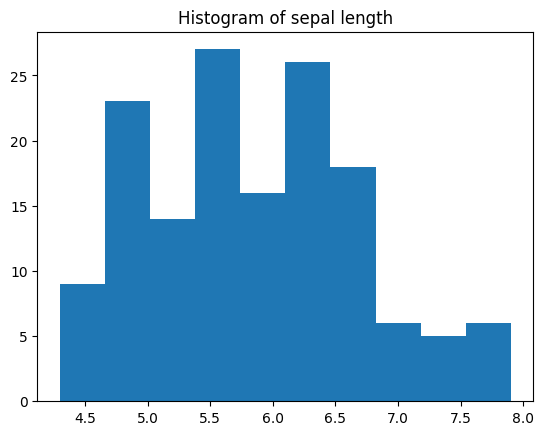

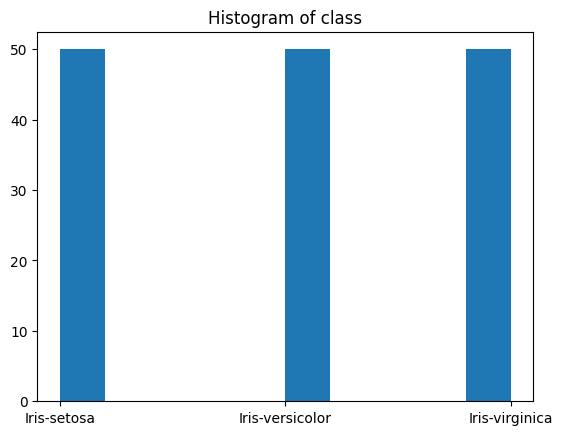

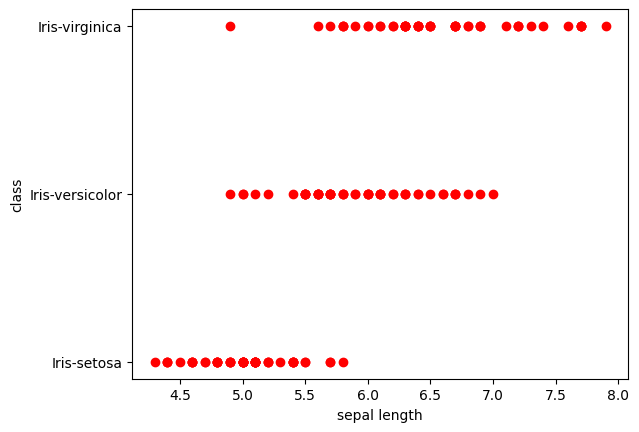

[3.5, 3.0, 3.2, 3.1, 3.6]
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']


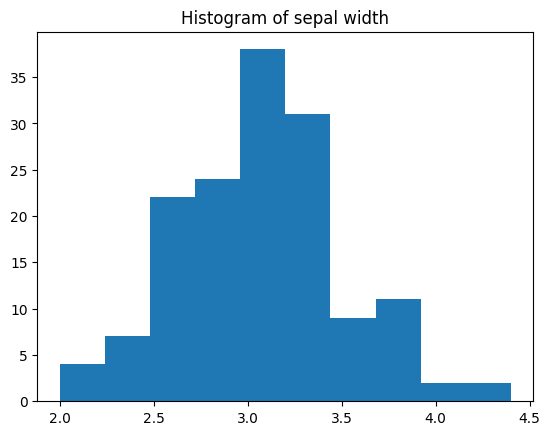

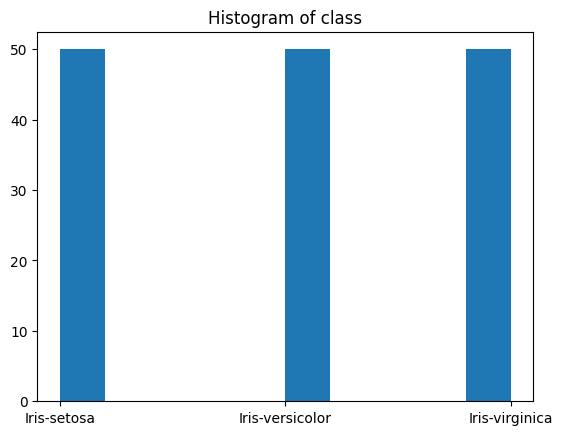

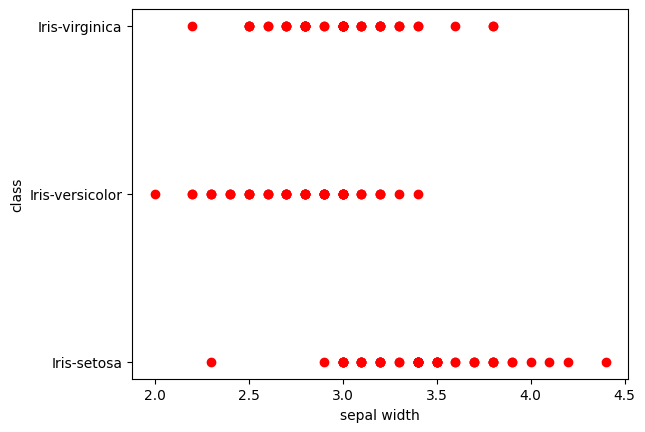

[1.4, 1.4, 1.3, 1.5, 1.4]
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']


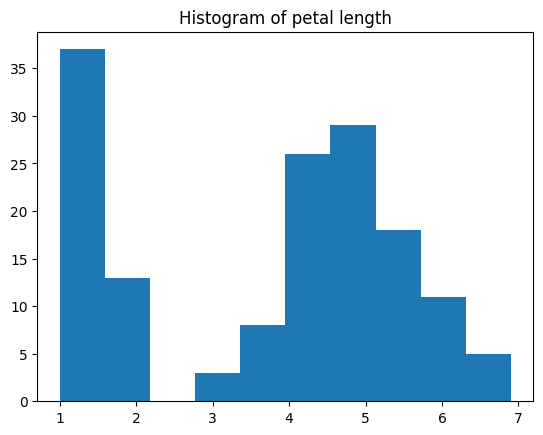

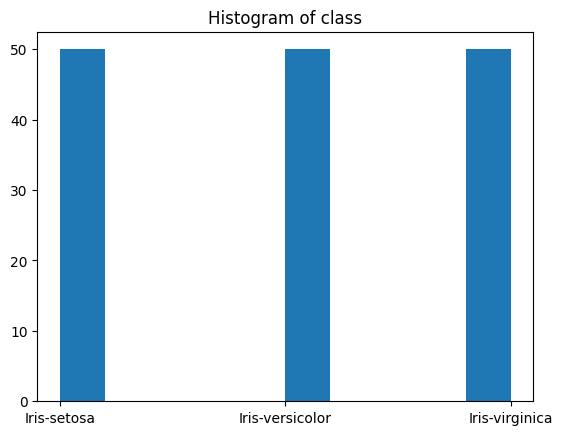

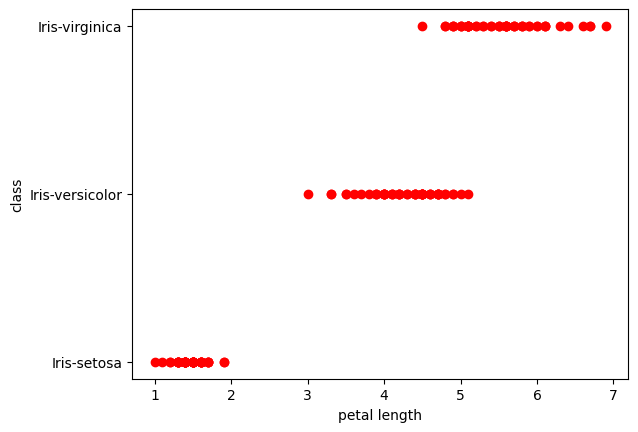

[0.2, 0.2, 0.2, 0.2, 0.2]
['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa']


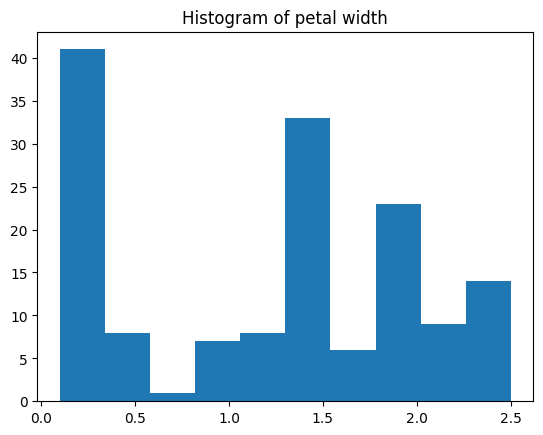

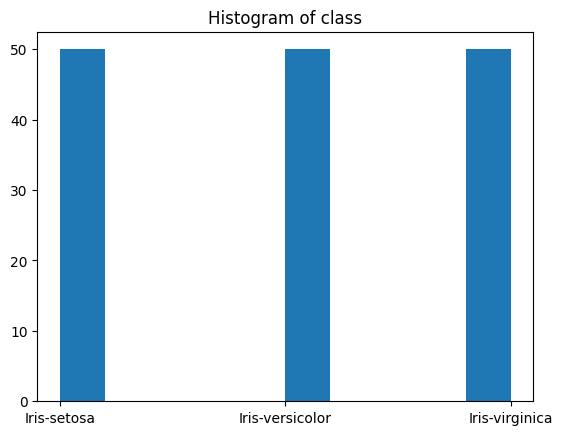

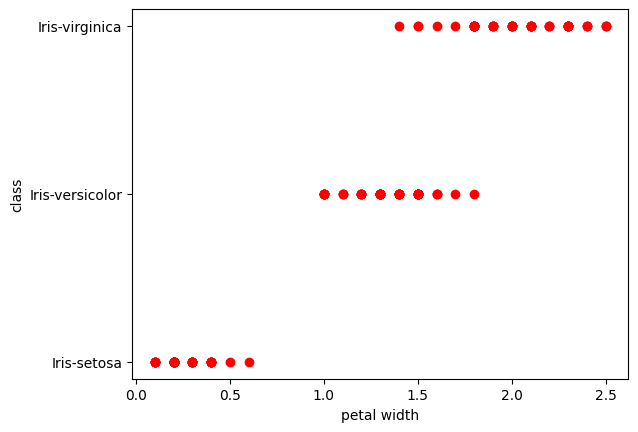

In [36]:
featureNames = ["sepal length","sepal width","petal length","petal width"]
outputName = "class"
fileName = "data/iris.csv"
inputs, outputs = load_data(fileName, featureNames, outputName)
inputs = fromStringToNumericData(inputs)

plot(inputs[0],outputs,"sepal length","class")
plot(inputs[1],outputs,"sepal width","class")
plot(inputs[2],outputs,"petal length","class")
plot(inputs[3],outputs,"petal width","class")

In [37]:
inputs2 = [[e1,e2,e3,e4] for e1,e2,e3,e4 in zip(inputs[0],inputs[1],inputs[2],inputs[3])]
inputs2 = np.array(inputs2)
inTr,outTr,inTe,outTe = impartire(inputs2,outputs)
outputs = fromStringToNumericData3(outputs)
outputs = np.array(outputs)

In [38]:
regressor = linear_model.LogisticRegression()

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True)

cross_val_results = cross_val_score(regressor, inputs2, outputs, cv=kf)

In [39]:
   
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [1.         1.         0.96666667 0.96666667 0.93333333]
Mean Accuracy: 0.9733333333333334


In [40]:
regressor = linear_model.LogisticRegression()
regressor.fit(inTr,outTr)
computedOutTe = regressor.predict([e1 for e1 in inTe])
target_names = ['Iris-setosa', 'Iris-versicolor','Iris-virginica']
print(classification_report(outTe, computedOutTe, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [41]:
y_pred = regressor.predict([[5.35,3.85,1.25,0.4]])
print(y_pred)

['Iris-setosa']


# Rezolvare 2

In [42]:
inTr = np.array(inTr)
outTr = fromStringToNumericData3(outTr)
outTr = np.array(outTr)

inTe = np.array(inTe)
outTe = fromStringToNumericData3(outTe)
outTe = np.array(outTe)

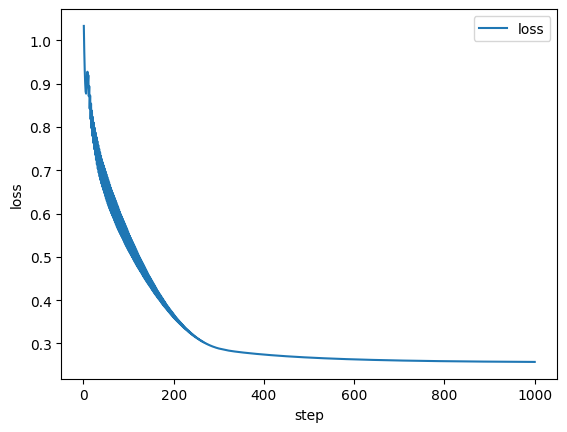

In [43]:
onehot_encoder = OneHotEncoder(sparse_output=False)

def loss(X, Y, W):
    Z = - X @ W
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W, mu):
    Z = - X @ W
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * (X.T @ (Y - P)) + 2 * mu * W
    return gd

def gradient_descent(X, Y, max_iter=1000, eta=0.1, mu=0.01):
    #eta = learning rate
    #mu = regularization parameter
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < max_iter:
        step += 1
        W -= eta * gradient(X, Y_onehot, W, mu)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - H @ self.W
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)

# fit model
model = Multiclass()
model.fit(inTr, outTr) 
# plot loss
model.loss_plot()

# predict 
model.predict(inTe)

computedOutTe = model.predict(inTe)

In [44]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(computedOutTe, outTe)
print(acc)

0.9666666666666667
